<a href="https://colab.research.google.com/github/vanecornejo/Simulaci-n-I/blob/main/Monte%20Carlo%20de%20Acierto%20y%20error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Acierto y Error

El método de Monte Carlo es una técnica numérica que se basa en la generación de números aleatorios para estimar soluciones a problemas matemáticos y físicos. Este método es especialmente útil cuando la función es difícil de integrar analíticamente. \\
En este caso, lo utilizamos para aproximar la integral de una función en un intervalo dado.


El método de Monte Carlo de acierto y error se basa en la siguiente idea:
1.   Se genera un rectángulo de referencia que encierra la curva de la función $f(x)$ en el intervalo $[a,b]$.
2.   Se lanzan puntos aleatorios dentro de este rectángulo.
3.   Se cuenta cuántos puntos caen bajo la curva de $f(x)$.
4.   La proporción de puntos dentro del área bajo la curva respecto al total de puntos generados permite estimar la integral.

En este caso, haremos el ejercicio con la siguiente integral
$$\int _0 ^1 \sqrt{arctan(x)} dx$$

Importamos las librerías necesarias para nuestro programa
numpy para los cálculos, matplotlib.pyplot para la gráfica y random para generar números aleatorios.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [24]:
# Definimos la función objetivo
def f(x):
    return np.sqrt(np.arctan(x))

In [25]:
sup = f(1) # definimos la cota superior de la función en [0,1]

def dardos(n):
    exitos = 0  # contador de éxitos obtenidos
    for i in range(n):
        u1 = rd.uniform(0, 1)
        u2 = rd.uniform(0, sup)

        if u2 <= f(u1):
            exitos += 1  # si el punto cae dentro del contador, se suma un éxito al contador
    prob = exitos / n  # la probabilidad
    integral = prob * (1*sup)  # obtenemos la integral estimada, con el área del rectángulo base = 1*f(1)
    return integral

Ahora, se va a definir una función que ejecuta múltiples experimentos y almacena los resultados en una lista


In [26]:
def experimentos(m, n):
    lista = []
    for i in range(m):
        d = dardos(n)
        lista.append(d)
    return lista

Damos el número de experimentos que vamos a realizar y el número de puntos que se lanzarán por experimento, calculamos los valores estadísticos e imprimimos resultados.

In [29]:
m = 1000  # Número de experimentos
n = 10000  # Número de puntos por experimento

L = experimentos(m, n) # ejecutamos los experimentos

media = np.mean(L) # calcula la media
desviacion = np.std(L) # calcula desviación estándar
error = desviacion / np.sqrt(m) # calculamos el error estadístico

# imprimimos resultados
print(f"El valor estimado de la integral es: {L[-1]}")
print(f"La media de las estimaciones es: {media}")
print(f"El error estándar es: {error}")

El valor estimado de la integral es: 0.6347157240092652
La media de las estimaciones es: 0.629796278346077
El error estándar es: 0.00012746648111719726


Graficamos la función objetivo f(x)

Text(0, 0.5, 'f(x)')

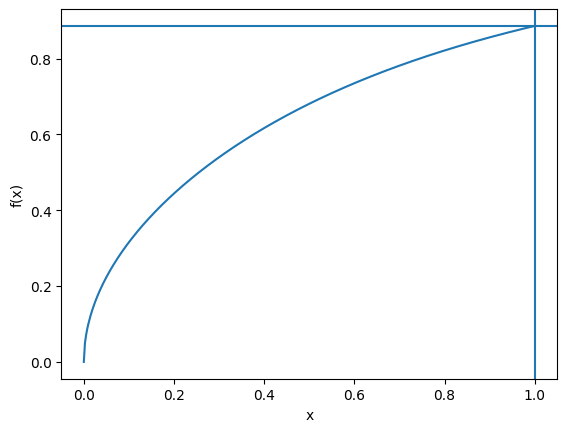

In [31]:
# Gráfica de la función f(x)
x = np.linspace(0, 1, 400)
y = f(x)
plt.plot(x, y)
plt.axhline(f(1))
plt.axvline(1)
plt.xlabel("x")
plt.ylabel("f(x)")

Veamos ahora la gráfica de la convergencia de Monte Carlo

Text(0, 0.5, 'Estimación de la integral')

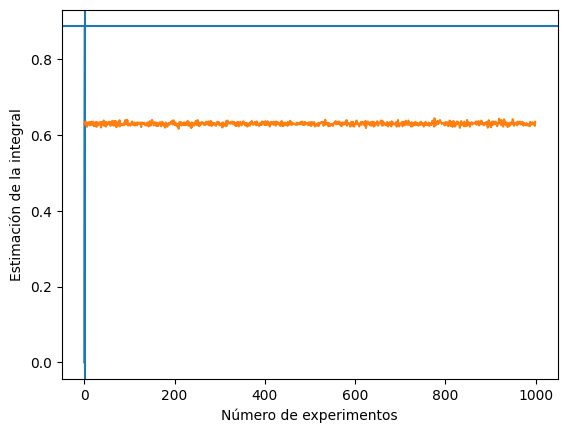

In [36]:
x = np.linspace(0, 1, 400)
y = f(x)
plt.plot(x, y)
plt.axhline(f(1))
plt.axvline(1)
plt.plot(L)
plt.xlabel("Número de experimentos")
plt.ylabel("Estimación de la integral")